In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

#TASK 1
#1.1: The 5 chosen and identified data is Tur_ID, Date, lingenavn, kjøretøy_kapasitet, and passasjer_ombord. 
#LETS DO THIS.... in the next lines.

In [3]:
#importing the ruter data for reading...
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [4]:
#Reading the CSV-file...
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
#Dropping the rest of the features i don't deem to be unique.
df = df.drop(["Område","Fylke","Kommune","Holdeplass_Fra","Holdeplass_Til","Linjetype","Linjefylke","Linjeretning","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10


In [6]:
#Now i have the 5 features that i chose at the start of the solution.

#1.2: When it comes to the feature engineering part of it, there's nothing specific to do, so i just 'freestyled' using what i learned.
# I'm setting up the dataset so that if the passergers are less than 6, then the buss drops the heater because we dont want to loose electricity. 

In [7]:
#We can start by creating the conditions, and then find out for which time and routes the heater was off basically.
# I will start by adding a column for heater.
df['heater'] = df['Passasjerer_Ombord'] > 5
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord,heater
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5,False
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5,False
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6,True
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10,True


In [8]:
#Lets take this a step further by showing if the buss is availble for... let's say 20 people.
# this would mean that the buss must have max 92 passengers and any number of passengers less than 92 would make the bus availble for 20 people.

df['availablity'] = df['Passasjerer_Ombord'] < 92
df.head()

,TurId,Dato,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord,heater,availablity
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,150,112,5,False,True
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,150,112,5,False,True
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,150,112,6,True,True
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,150,112,10,True,True
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,150,112,10,True,True


<AxesSubplot:>

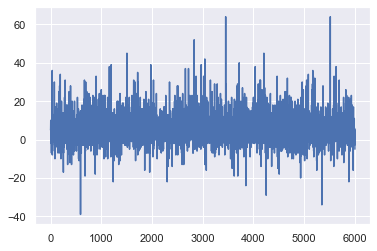

In [9]:
#1.3 VISUALIZAITION
#When it comes to visualization, im thinking to plot the passengers onboard against the different routesID (TurID).

df['Passasjerer_Ombord'].plot.line()

<AxesSubplot:>

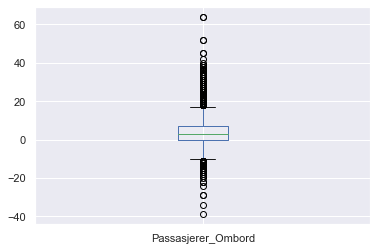

In [10]:
df["Passasjerer_Ombord"].plot.box()

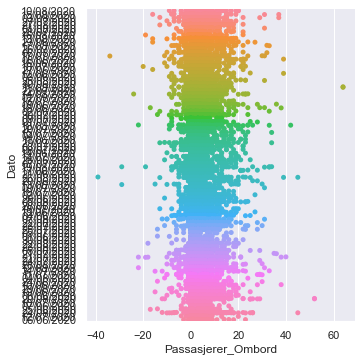

In [11]:
sns.catplot(x="Passasjerer_Ombord", y="Dato", data=df)

In [ ]:
# This last graph is showing the passengers onboard along with their respective dates.
# The problem is that there are alot of dates in the data-set and the graph is trying to ram everything together in small space.